# 1. Cargar y Describir el Dataset

In [56]:
# Importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset desde un archivo CSV
df = pd.read_csv('titanic.csv')

# Descripción básica del dataset
print(df.info())  # Ver las columnas y tipos de datos
print(df.describe())  # Descripción estadística
print(df.head())  # Primeras filas del dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp   
count   418.000000  418.000000  418.000000  332.000000  418.000000  \
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.48162

# 2. Limpieza de Datos

In [57]:
# Verificar valores faltantes
print(df.isnull().sum())

# Manejar valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)  # Imputamos la mediana en 'age'
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Imputamos el modo en 'embarked'

# Eliminar duplicados si los hay
df.drop_duplicates(inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# 3. Análisis Univariado
   
   Haremos un análisis de la distribución de las variables más importantes, como Age, Fare, y Survived.

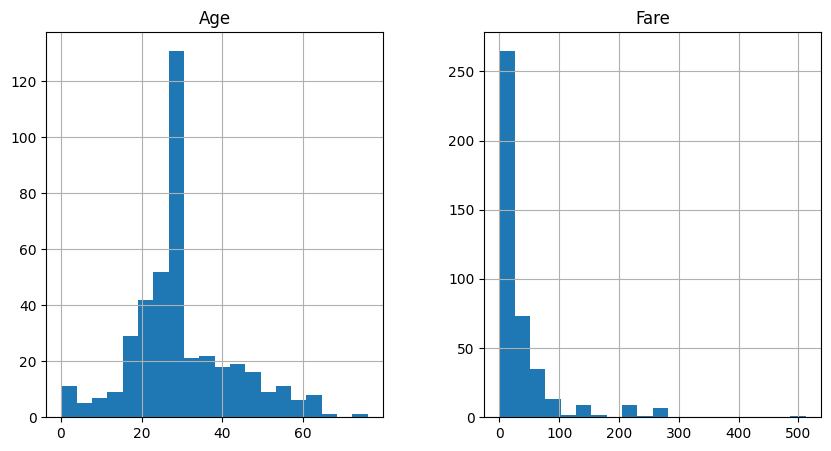

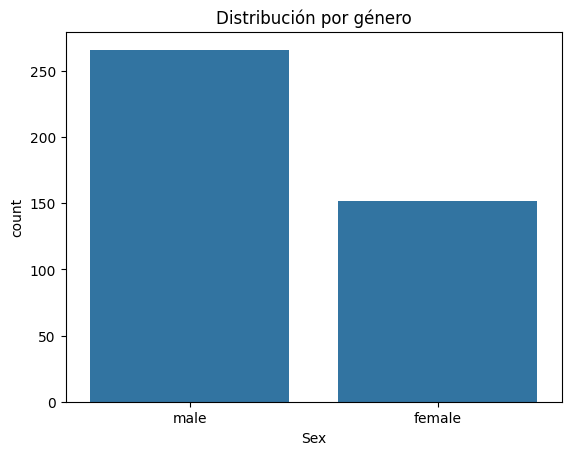

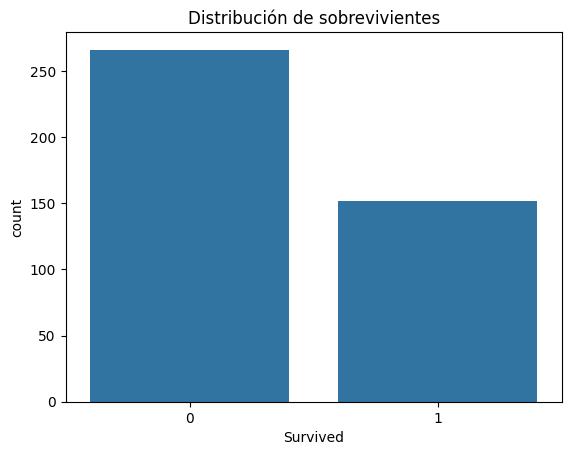

In [58]:
# Histogramas de variables numéricas
df[['Age', 'Fare']].hist(bins=20, figsize=(10,5))
plt.show()

# Análisis de la variable categórica 'sex'
sns.countplot(x='Sex', data=df)
plt.title('Distribución por género')
plt.show()

# Análisis de la variable de salida 'survived'
sns.countplot(x='Survived', data=df)
plt.title('Distribución de sobrevivientes')
plt.show()


- Para la primera grafica nos damos cuenta que mayormente hay mas pasajeros adultos jovenes en un rango de edad entre 20 y 30 años, ademas que la mayor cantidad de pasajeros son de clase baja, nos damos cuenta de eso gracias que se encuentran en mayor cantidad las de menor valor

- En la segunda grafica es evidente que hubo mas cantidad de pasajeros varones que femeninos

- En la tercera grafica podemos observar que la cantodad de sobrevivientes es comparativamente mas baja que los que no lo lograron  

# 4. Análisis Bivariado
   
   Analizaremos cómo las diferentes variables (como Age, Fare, Sex, Pclass) afectan la supervivencia.

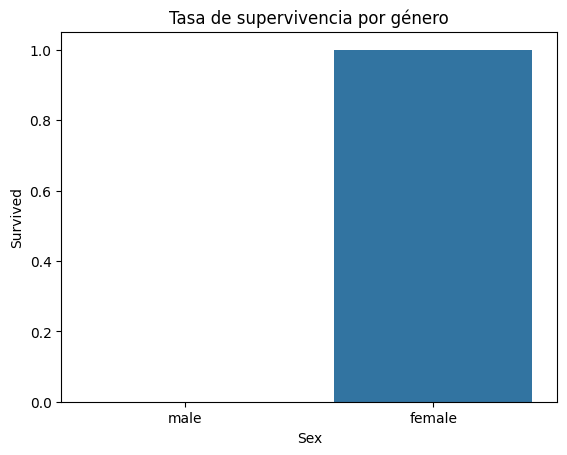

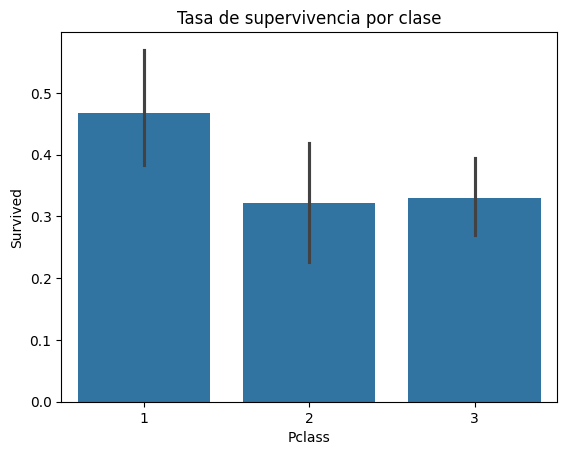

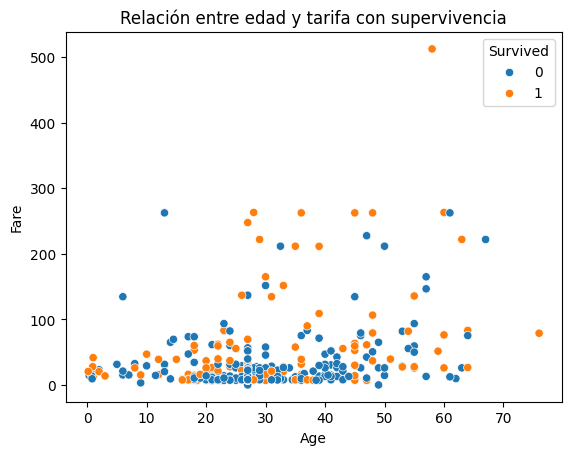

In [59]:
# Gráfico de supervivencia por género
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Tasa de supervivencia por género')
plt.show()

# Gráfico de supervivencia por clase
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Tasa de supervivencia por clase')
plt.show()

# Gráfico de dispersión entre edad y tarifa
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Relación entre edad y tarifa con supervivencia')
plt.show()


- Para la primera grafica nos damos cuenta que de los sobrevivientes fueron pasajeros femeninos.

- En la segunda grafica es evidente como afecta la clase de los pasajeros el hecho de haber sobrevivido dando por hecho que los de primera clase son quien en su mayoria sobreviven.

# 5. Visualización de Correlaciones
   
   Usamos un heatmap para visualizar las correlaciones entre las variables numéricas del dataset.

In [60]:
# Convertir variables categóricas a numéricas si es necesario
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [66]:
print(df['Sex'].head())
print(df['Embarked'].head())

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64
0    1
1    2
2    1
3    2
4    2
Name: Embarked, dtype: int64


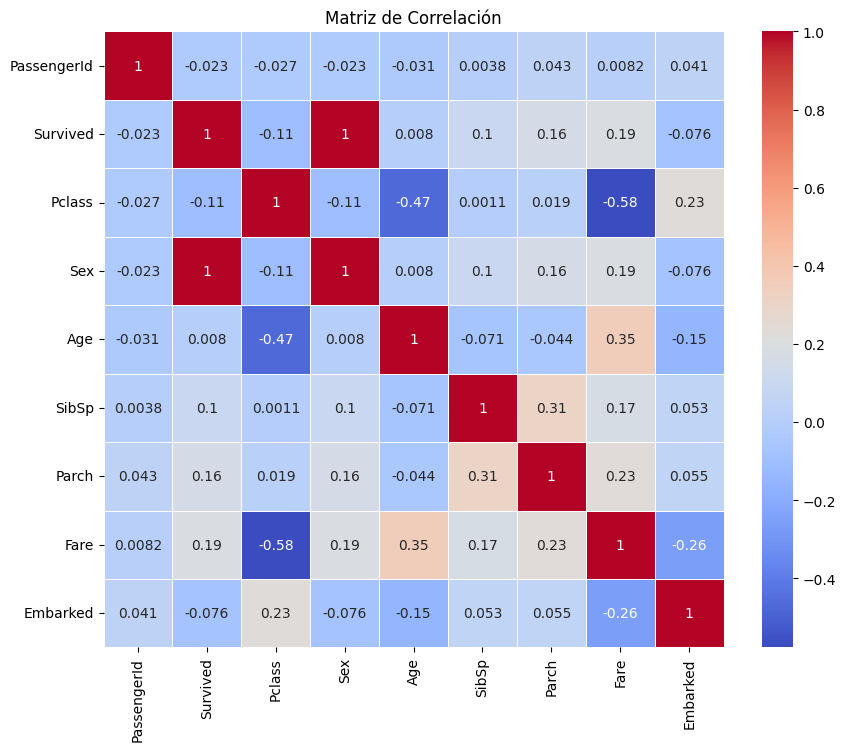

In [67]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Matriz de correlación
corr_matrix = numeric_df.corr()

# Heatmap de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Concluiones

1. Relación entre Sex y Survived:

Correlación: La variable Sex tiene una correlación positiva significativa con Survived (aproximadamente 1.0).
Conclusión: Esto indica que el género tiene una gran influencia en la probabilidad de supervivencia, con las mujeres (representadas por el valor 1) siendo mucho más propensas a sobrevivir que los hombres (representados por el valor 0).

2. Relación entre Pclass y Survived:

Correlación: La clase (Pclass) tiene una correlación negativa moderada con la supervivencia (alrededor de -0.11).
Conclusión: Esto sugiere que a medida que aumenta la clase del pasajero (es decir, una clase más baja como tercera clase), disminuye la probabilidad de supervivencia. Los pasajeros de primera clase eran más propensos a sobrevivir.

3. Relación entre Fare y Pclass:

Correlación: Existe una correlación negativa fuerte entre Fare y Pclass (-0.58).
Conclusión: A medida que aumenta el precio del pasaje (Fare), disminuye el valor de Pclass (es decir, los pasajeros que pagaron más generalmente estaban en primera clase).

4. Relación entre Fare y Survived:

Correlación: La tarifa (Fare) tiene una correlación positiva con la supervivencia (alrededor de 0.19).
Conclusión: Los pasajeros que pagaron tarifas más altas tenían una mayor probabilidad de sobrevivir, lo cual tiene sentido ya que las tarifas más altas se asocian con las clases más altas, que tuvieron mayores tasas de supervivencia.

5. Relación entre Age y Pclass:

Correlación: La variable Age tiene una correlación negativa con Pclass (-0.47).
Conclusión: Los pasajeros de clases más bajas tienden a ser más jóvenes, mientras que las personas de clases más altas tienden a ser mayores.

6. Relación entre SibSp, Parch y Survived:

Correlación: Tanto SibSp (hermanos/cónyuge a bordo) como Parch (padres/hijos a bordo) tienen correlaciones positivas débiles con Survived (0.10 y 0.16, respectivamente).
Conclusión: Las personas que viajaban con familiares tenían una ligera mayor probabilidad de sobrevivir en comparación con aquellos que viajaban solos, aunque esta influencia es relativamente pequeña.

7. Relación entre Age y Survived:

Correlación: Age tiene una correlación muy baja con la supervivencia (casi 0).
Conclusión: No parece haber una relación significativa entre la edad de los pasajeros y la probabilidad de supervivencia. La edad por sí sola no fue un factor determinante en la supervivencia.

# Resumen General:

- El género (Sex) y la clase del pasajero (Pclass) son los factores más influyentes en la probabilidad de supervivencia, con las mujeres y los pasajeros de clases más altas teniendo más probabilidades de sobrevivir.

- El precio del pasaje (Fare) también tiene una correlación positiva con la supervivencia, probablemente debido a su relación con la clase social.

- Las relaciones familiares a bordo (reflejadas en SibSp y Parch) tienen una pequeña influencia positiva en la supervivencia.

- La edad no parece ser un factor determinante en la probabilidad de supervivencia.